In [52]:
import numpy 
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
numpy.random.seed(10)

In [53]:
all_df = pd.read_csv("data/bank.csv")

In [54]:
cols=['age','balance' ,'day', 'duration',
       'campaign','pdays','previous','deposit']
all_df=all_df[cols]

In [55]:
all_df['deposit']= all_df['deposit'].map({'no':0, 'yes': 1}).astype(int)

In [56]:
X=all_df.drop(['deposit'], axis=1).values.astype('float64')

In [57]:
Y = all_df['deposit'].values.astype('int64')

In [58]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.2, random_state=True) 
len(train_Features)

8929

In [59]:
test_Features[:2]

array([[-0.85890111, -0.3021573 , -1.26574556, -0.8008745 , -0.55416834,
        -0.48118405, -0.36325984],
       [ 0.14841574, -0.31455937,  0.51565047, -0.97372895, -0.18678537,
        -0.48118405, -0.36325984]])

In [60]:
train_Label[:4]

array([0, 1, 0, 1])

In [61]:
train_Features.shape

(8929, 7)

In [62]:
test_Label[:4]

array([0, 0, 0, 1])

In [63]:
train_Features = train_Features.reshape((train_Features.shape[0], train_Features.shape[1], 1))

In [64]:
test_Features = test_Features.reshape((test_Features.shape[0], test_Features.shape[1], 1))

In [65]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.layers.embeddings import Embedding
from keras.layers.recurrent import LSTM
from keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)

In [66]:
model = Sequential()

In [67]:
model.add(LSTM(units=7, input_shape=(7,1)))

In [68]:
model.add(Dense(1, activation = "sigmoid"))

In [69]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_3 (LSTM)                (None, 7)                 252       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 8         
Total params: 260
Trainable params: 260
Non-trainable params: 0
_________________________________________________________________


In [70]:
model.compile(loss='binary_crossentropy', 
              optimizer='adam', metrics=['accuracy'])

In [71]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=30, 
                         batch_size=500,verbose=1,callbacks=[early_stopping])

Train on 7143 samples, validate on 1786 samples
Epoch 1/30
7143/7143 [==============================] - 3s 377us/step - loss: 0.7013 - acc: 0.4015 - val_loss: 0.6987 - val_acc: 0.3785
Epoch 2/30
7143/7143 [==============================] - 0s 50us/step - loss: 0.6966 - acc: 0.4241 - val_loss: 0.6938 - val_acc: 0.5521
Epoch 3/30
7143/7143 [==============================] - 1s 77us/step - loss: 0.6923 - acc: 0.5649 - val_loss: 0.6896 - val_acc: 0.5823
Epoch 4/30
7143/7143 [==============================] - 0s 56us/step - loss: 0.6883 - acc: 0.5801 - val_loss: 0.6854 - val_acc: 0.5935
Epoch 5/30
7143/7143 [==============================] - 0s 57us/step - loss: 0.6844 - acc: 0.5860 - val_loss: 0.6812 - val_acc: 0.6019
Epoch 6/30
7143/7143 [==============================] - 0s 67us/step - loss: 0.6804 - acc: 0.5944 - val_loss: 0.6772 - val_acc: 0.6025
Epoch 7/30
7143/7143 [==============================] - 0s 54us/step - loss: 0.6763 - acc: 0.6023 - val_loss: 0.6734 - val_acc: 0.6109
Epoch 

In [72]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

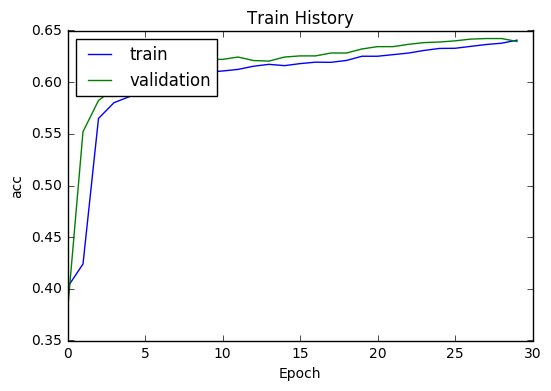

In [73]:
show_train_history(train_history,'acc','val_acc')

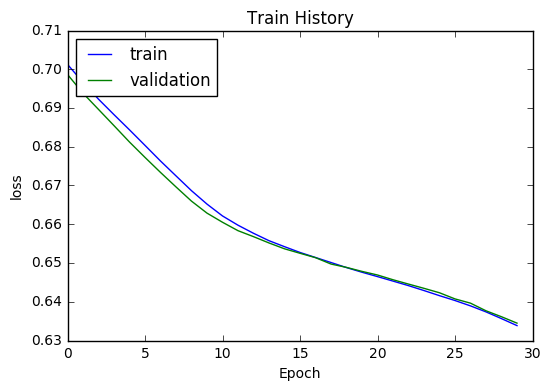

In [74]:
show_train_history(train_history,'loss','val_loss')

In [75]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

2233/2233 [==============================] - 0s 167us/step


In [76]:
scores[1]

0.6368114644243639